<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Bayesian" data-toc-modified-id="Bayesian-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian</a></span><ul class="toc-item"><li><span><a href="#Single-groupby-(categorical)" data-toc-modified-id="Single-groupby-(categorical)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Single groupby (categorical)</a></span></li><li><span><a href="#Single-groupby-(ordinal)" data-toc-modified-id="Single-groupby-(ordinal)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Single groupby (ordinal)</a></span></li><li><span><a href="#Multiple-groupby-(categorical)" data-toc-modified-id="Multiple-groupby-(categorical)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Multiple groupby (categorical)</a></span></li><li><span><a href="#Multiple-groupby-(ordinal-+-categorical)" data-toc-modified-id="Multiple-groupby-(ordinal-+-categorical)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Multiple groupby (ordinal + categorical)</a></span></li><li><span><a href="#Ordinal-+-2-categorical" data-toc-modified-id="Ordinal-+-2-categorical-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ordinal + 2 categorical</a></span></li></ul></li><li><span><a href="#Frequentist" data-toc-modified-id="Frequentist-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Frequentist</a></span><ul class="toc-item"><li><span><a href="#Single-categorical" data-toc-modified-id="Single-categorical-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Single categorical</a></span></li><li><span><a href="#Multi-categorical" data-toc-modified-id="Multi-categorical-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Multi categorical</a></span></li></ul></li><li><span><a href="#Ordinal-+-Categorical" data-toc-modified-id="Ordinal-+-Categorical-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ordinal + Categorical</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import warnings

In [3]:
import spotify_confidence as confidence
confidence.options.set_option('randomization_seed', 1)

# Bayesian

## Single groupby (categorical)

In [4]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2'],
                   'success': [50, 4, 10],
                   'total': [100, 10, 15],
                   'other unused column': [1, 1, 1]})
df.head()

,variation_name,success,total,other unused column
0,test,50,100,1
1,control,4,10,1
2,test2,10,15,1


In [5]:
test = confidence.BetaBinomial(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               categorical_group_columns='variation_name')

In [6]:
test.summary()

,variation_name,success,total,point_estimate,ci_lower,ci_upper
0,test,50,100,0.500000,0.403174,0.596826
1,control,4,10,0.400000,0.153067,0.696321
2,test2,10,15,0.666667,0.415836,0.859747


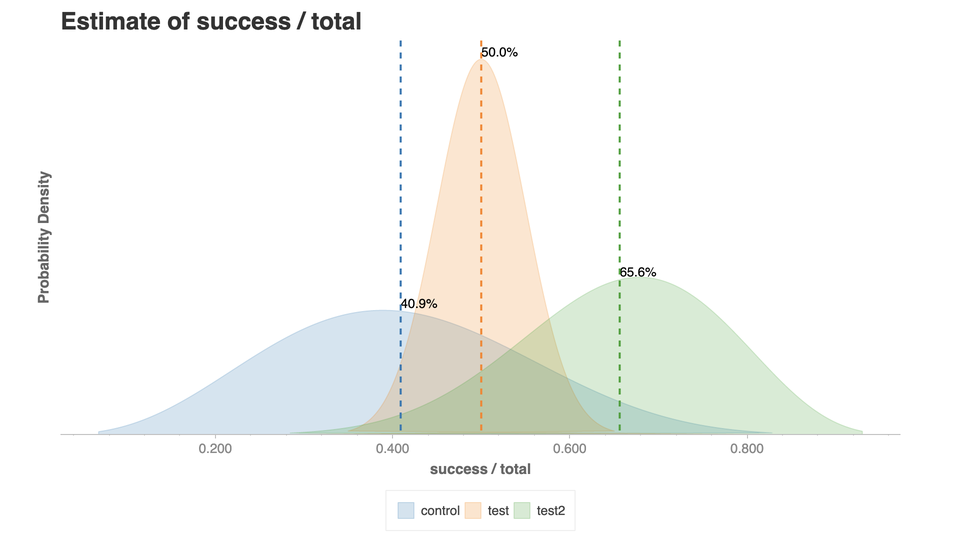

In [7]:
test.summary_plot().show('png')

In [8]:
test.difference('control', 'test')

,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,control,test,True,0.091138,-0.212183,0.366671,0.725982,-0.117625,0.026487,-0.026487,0.117625


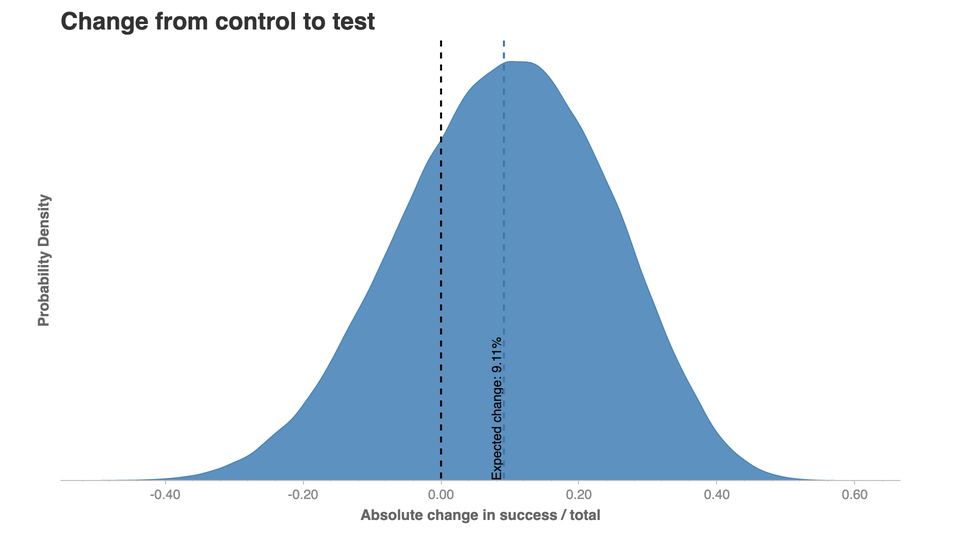

In [9]:
test.difference_plot('control', 'test').show('png')

In [10]:
test.multiple_difference('test')

,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,control,test,True,0.091138,-0.212183,0.366671,0.725982,-0.117625,0.026487,-0.026487,0.117625
1,test2,test,True,-0.156569,-0.383913,0.101196,0.112176,-0.007349,0.163917,-0.163917,0.007349


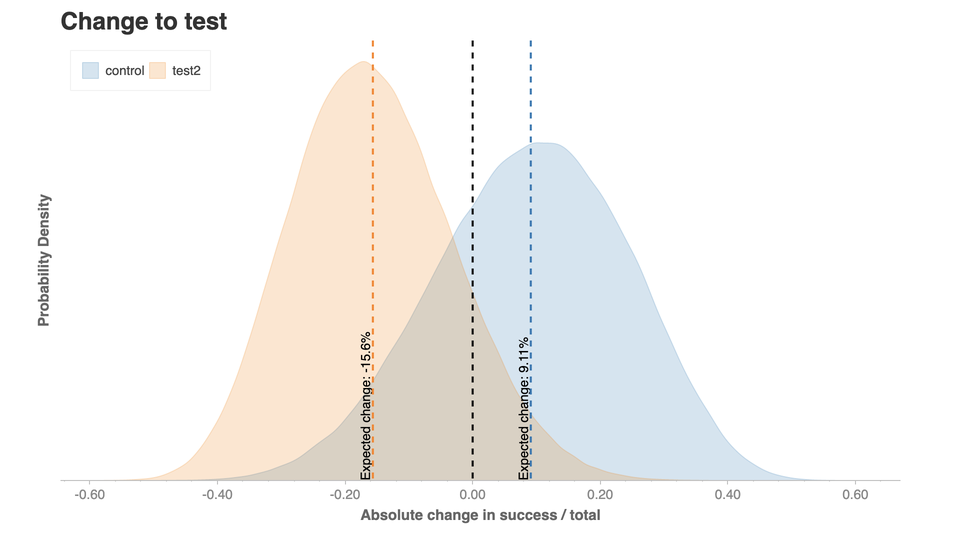

In [11]:
test.multiple_difference_plot('test').show('png')

## Single groupby (ordinal)

In [12]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',],
                   'success': [500, 8, 100,
                               510, 8, 100,
                               520, 9, 104,
                               530, 7, 100,
                               530, 8, 103,],
                   'total': [1010, 22, 150,
                             1000, 20, 153,
                             1030, 23, 154,
                             1000, 20, 150,
                             1040, 21, 155,],
                   'date': ['2018-01-01', '2018-01-01', '2018-01-01',
                            '2018-01-02', '2018-01-02', '2018-01-02',
                            '2018-01-03', '2018-01-03', '2018-01-03',
                            '2018-01-04', '2018-01-04', '2018-01-04', 
                            '2018-01-05', '2018-01-05', '2018-01-05',]})
# Cast to datetime
df['date'] = pd.to_datetime(df['date'])
df.head()

,variation_name,success,total,date
0,test,500,1010,2018-01-01
1,control,8,22,2018-01-01
2,test2,100,150,2018-01-01
3,test,510,1000,2018-01-02
4,control,8,20,2018-01-02


In [13]:
test = confidence.BetaBinomial(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               categorical_group_columns='variation_name',
                               ordinal_group_column='date')

In [14]:
test.summary()

,variation_name,date,success,total,point_estimate,ci_lower,ci_upper
0,test,2018-01-01,500,1010,0.495050,0.464266,0.525861
1,control,2018-01-01,8,22,0.363636,0.189323,0.571290
2,test2,2018-01-01,100,150,0.666667,0.588610,0.738361
3,test,2018-01-02,510,1000,0.510000,0.479025,0.540917
4,control,2018-01-02,8,20,0.400000,0.210629,0.616080
5,test2,2018-01-02,100,153,0.653595,0.575883,0.725557
6,test,2018-01-03,520,1030,0.504854,0.474343,0.535339
7,control,2018-01-03,9,23,0.391304,0.214311,0.593805
8,test2,2018-01-03,104,154,0.675325,0.598643,0.745486
9,test,2018-01-04,530,1000,0.530000,0.499017,0.560810


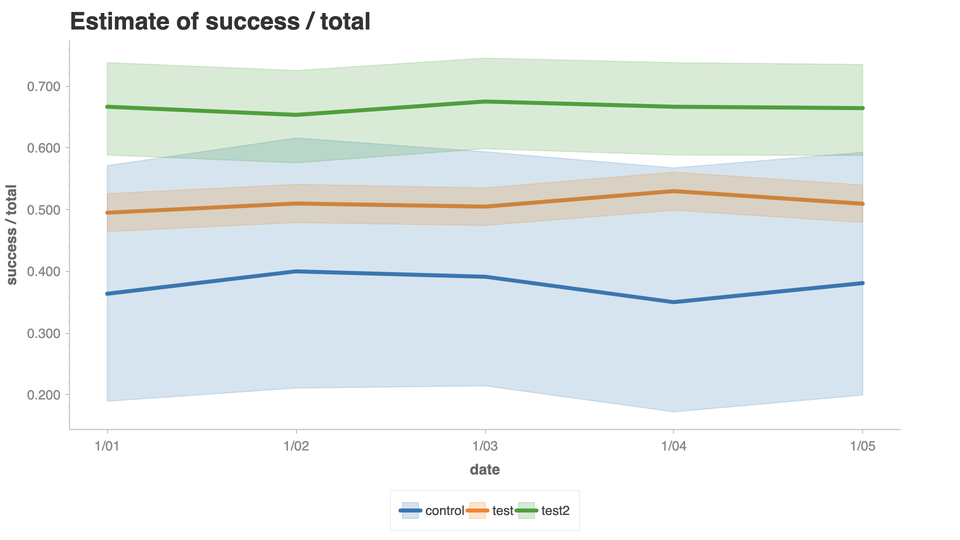

In [15]:
test.summary_plot().show('png')

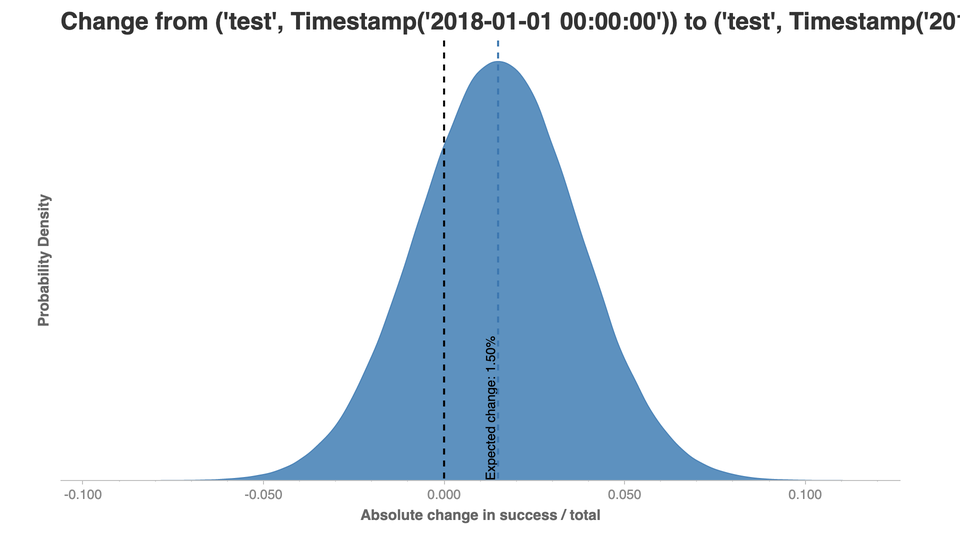

In [16]:
test.difference_plot(('test', pd.to_datetime('2018-01-01')), ('test', pd.to_datetime('2018-01-02'))).show('png')

In [17]:
test.multiple_difference(level='control', groupby='date', level_as_reference=True)

,date,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,2018-01-01,control,test,True,0.125497,-0.078808,0.308101,0.889504,-0.131163,0.005666,-0.005666,0.131163
1,2018-01-01,control,test2,True,0.296261,0.082083,0.491822,0.996578,-0.296371,0.000110,-0.000110,0.296371
2,2018-01-02,control,test,True,0.105114,-0.108412,0.301877,0.834746,-0.114703,0.009590,-0.009590,0.114703
3,2018-01-02,control,test2,True,0.247916,0.023538,0.456710,0.984826,-0.248494,0.000578,-0.000578,0.248494
4,2018-01-03,control,test,True,0.108755,-0.091976,0.293397,0.858546,-0.116248,0.007493,-0.007493,0.116248
5,2018-01-03,control,test2,True,0.278191,0.067520,0.474104,0.995294,-0.278341,0.000150,-0.000150,0.278341
6,2018-01-04,control,test,True,0.173046,-0.039853,0.361055,0.945390,-0.175579,0.002533,-0.002533,0.175579
7,2018-01-04,control,test2,True,0.308144,0.085283,0.508574,0.996566,-0.308256,0.000112,-0.000112,0.308256
8,2018-01-05,control,test,True,0.122876,-0.086391,0.312245,0.877688,-0.129400,0.006524,-0.006524,0.129400
9,2018-01-05,control,test2,True,0.276827,0.058186,0.478917,0.993642,-0.277049,0.000222,-0.000222,0.277049


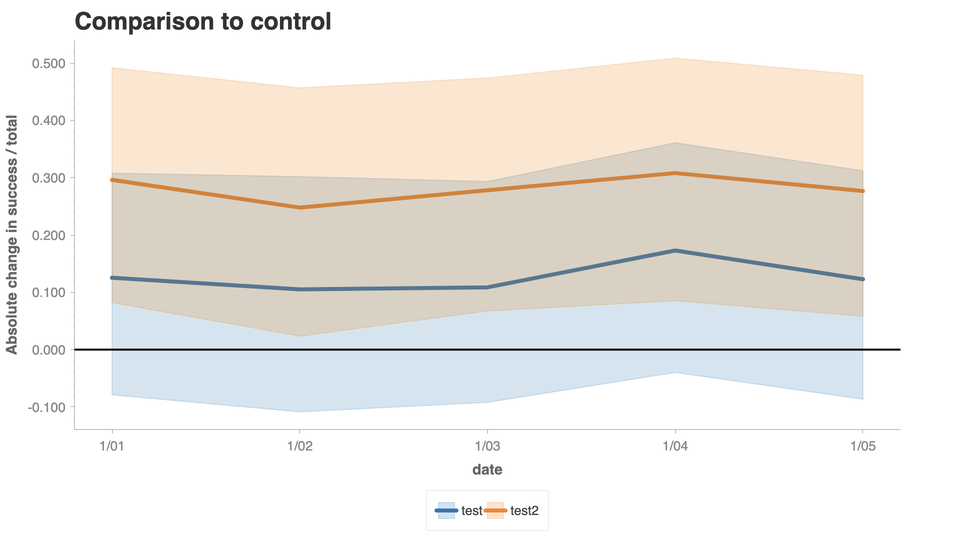

In [18]:
test.multiple_difference_plot(level='control', groupby='date', level_as_reference=True).show('png')

## Multiple groupby (categorical)

In [19]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2', 'test','control', 'test2'],
                   'success': [500, 42, 1005, 50, 4, 100],
                   'total': [1009, 104, 1502, 100, 10, 150],
                   'country': ['us','us','us','gb','gb','gb',
                ]})
df.head()

,variation_name,success,total,country
0,test,500,1009,us
1,control,42,104,us
2,test2,1005,1502,us
3,test,50,100,gb
4,control,4,10,gb


In [20]:
test = confidence.BetaBinomial(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               categorical_group_columns=['variation_name', 'country'])

In [21]:
test.summary()

,variation_name,country,success,total,point_estimate,ci_lower,ci_upper
0,test,us,500,1009,0.495540,0.464740,0.526366
1,control,us,42,104,0.403846,0.313242,0.499720
2,test2,us,1005,1502,0.669108,0.645004,0.692561
3,test,gb,50,100,0.500000,0.403174,0.596826
4,control,gb,4,10,0.400000,0.153067,0.696321
5,test2,gb,100,150,0.666667,0.588610,0.738361


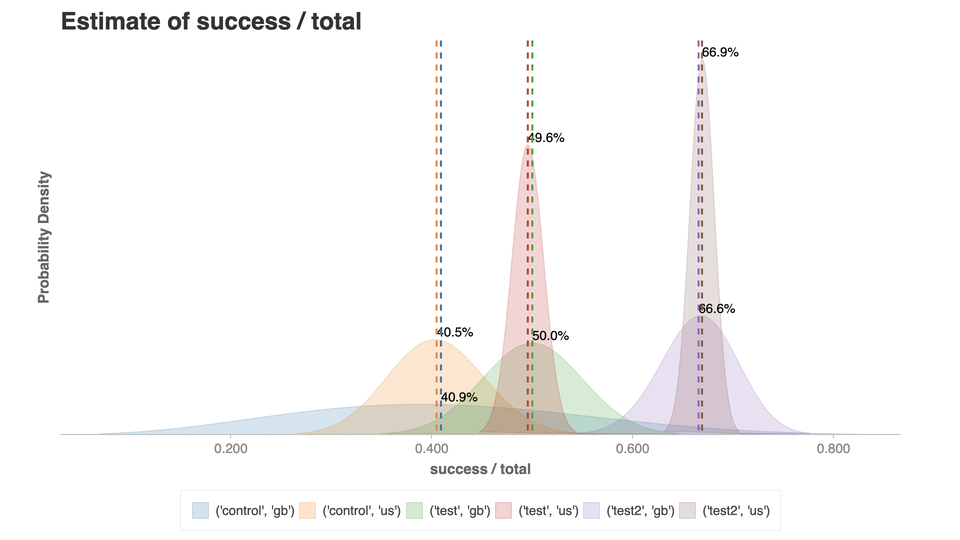

In [22]:
test.summary_plot().show('png')

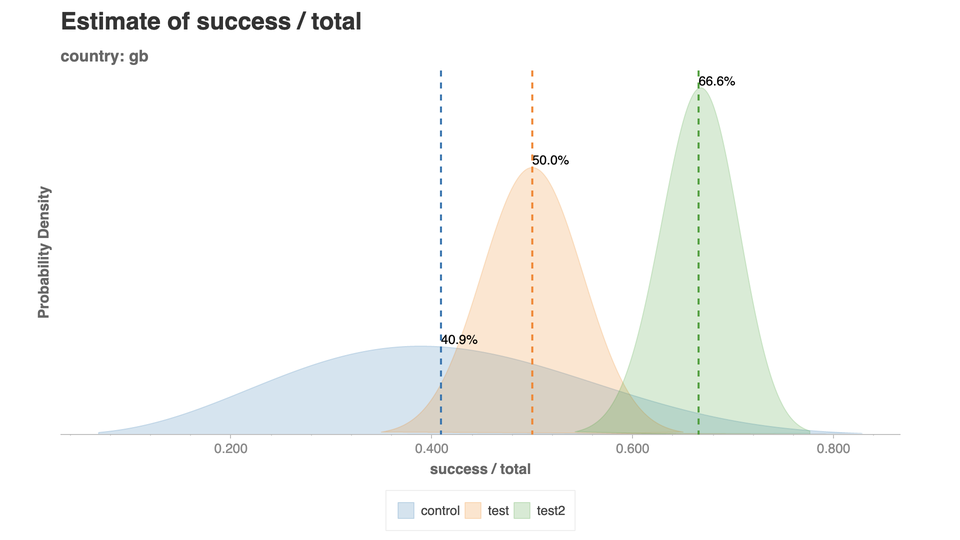

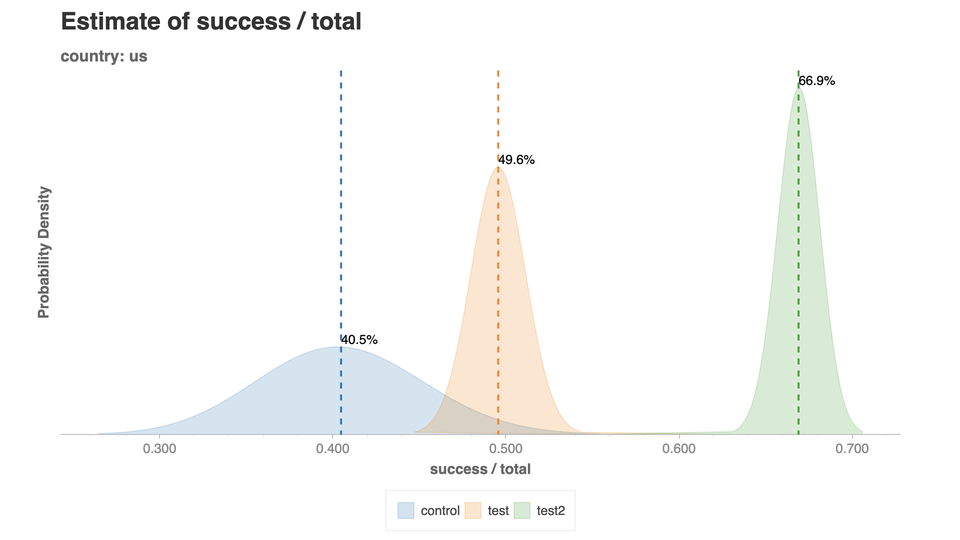

In [23]:
test.summary_plot(groupby='country').show('png')

In [24]:
test.difference(('control', 'gb'), ('test', 'gb'))

,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,"('control', 'gb')","('test', 'gb')",True,0.091138,-0.212183,0.366671,0.725982,-0.117625,0.026487,-0.026487,0.117625


In [25]:
test.difference('control', 'test', groupby='country')

,country,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,gb,control,test,True,0.091138,-0.212183,0.366671,0.725982,-0.117625,0.026487,-0.026487,0.117625
1,us,control,test,True,0.090804,-0.008836,0.187315,0.963228,-0.091565,0.000761,-0.000761,0.091565


In [26]:
test.difference('us', 'gb', groupby='variation_name')

,variation_name,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,control,us,gb,True,0.004370,-0.269541,0.305855,0.498462,-0.062806,0.058437,-0.058437,0.062806
1,test,us,gb,True,0.004387,-0.097180,0.106119,0.532806,-0.023067,0.018680,-0.018680,0.023067
2,test2,us,gb,True,-0.003355,-0.083993,0.073654,0.473716,-0.014416,0.017771,-0.017771,0.014416


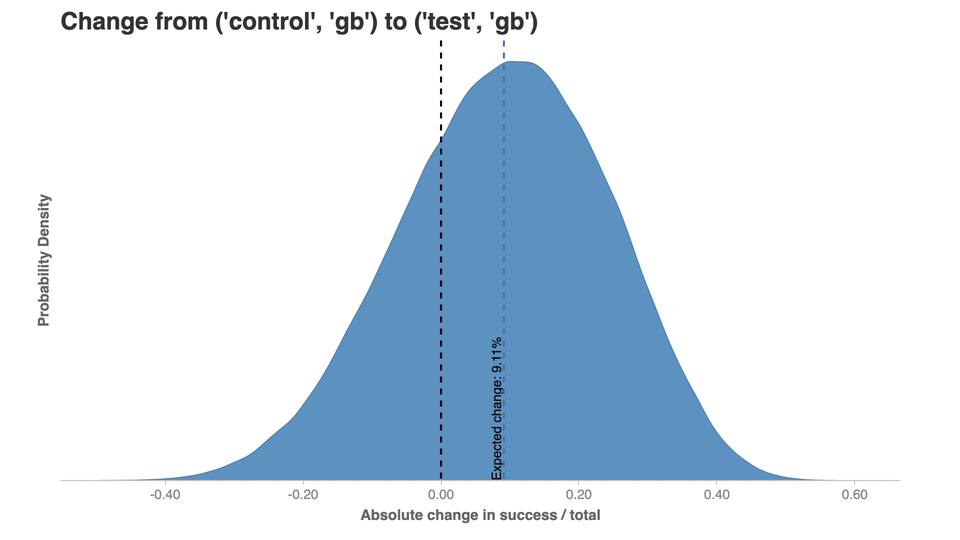

In [27]:
test.difference_plot(('control', 'gb'), ('test', 'gb')).show('png')

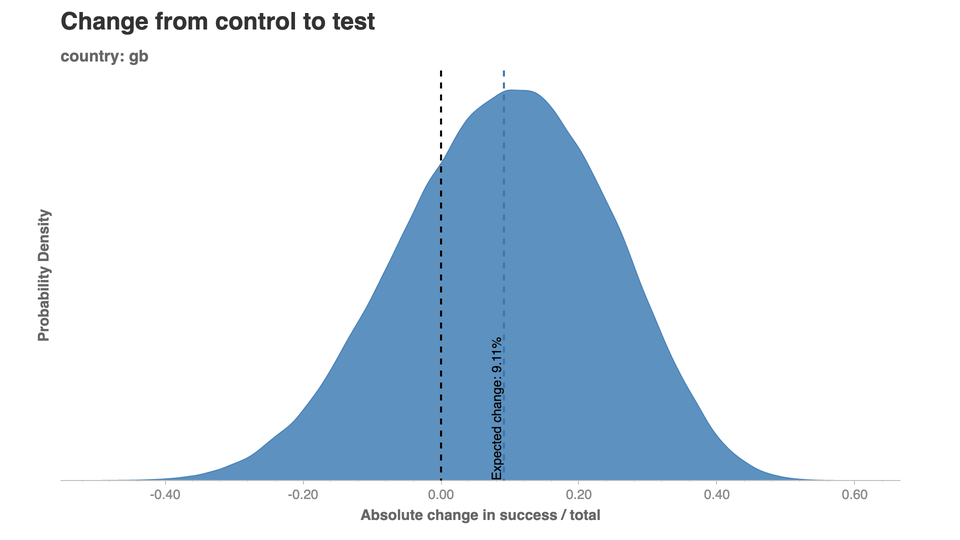

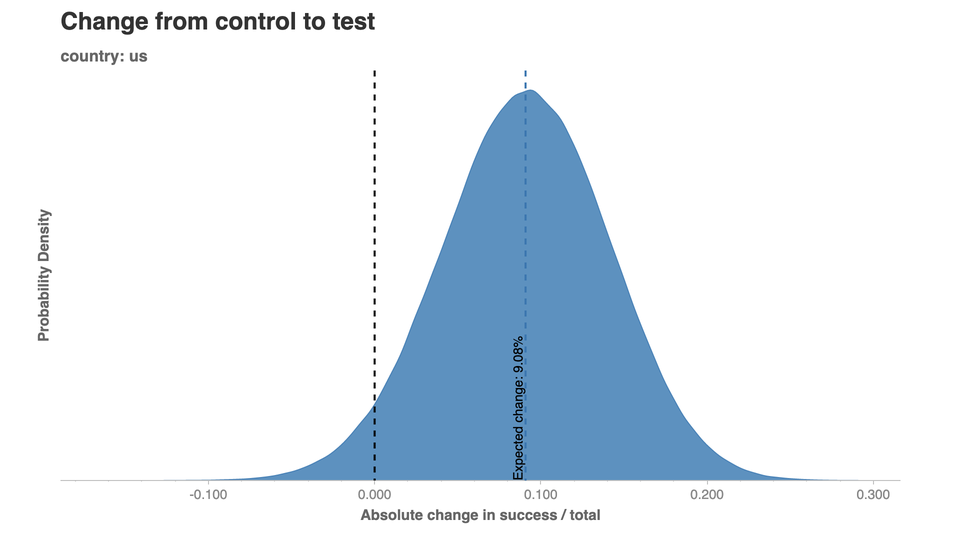

In [28]:
test.difference_plot('control', 'test', groupby='country').show('png')

## Multiple groupby (ordinal + categorical)

In [29]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',],
                   'success': [500, 8, 100,
                               510, 8, 100,
                               520, 9, 104,
                               530, 7, 100,
                               530, 8, 103,],
                   'total': [1010, 22, 150,
                             1000, 20, 153,
                             1030, 23, 154,
                             1000, 20, 150,
                             1040, 21, 155,],
                   'days_since_reg': [1, 1, 1,
                                      2, 2, 2,
                                      3, 3, 3,
                                      4, 4, 4,
                                      5, 5, 5],})
df.head()

,variation_name,success,total,days_since_reg
0,test,500,1010,1
1,control,8,22,1
2,test2,100,150,1
3,test,510,1000,2
4,control,8,20,2


In [30]:
test = confidence.BetaBinomial(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               categorical_group_columns='variation_name',
                               ordinal_group_column='days_since_reg')

In [31]:
test.summary()

,variation_name,days_since_reg,success,total,point_estimate,ci_lower,ci_upper
0,test,1,500,1010,0.495050,0.464266,0.525861
1,control,1,8,22,0.363636,0.189323,0.571290
2,test2,1,100,150,0.666667,0.588610,0.738361
3,test,2,510,1000,0.510000,0.479025,0.540917
4,control,2,8,20,0.400000,0.210629,0.616080
5,test2,2,100,153,0.653595,0.575883,0.725557
6,test,3,520,1030,0.504854,0.474343,0.535339
7,control,3,9,23,0.391304,0.214311,0.593805
8,test2,3,104,154,0.675325,0.598643,0.745486
9,test,4,530,1000,0.530000,0.499017,0.560810


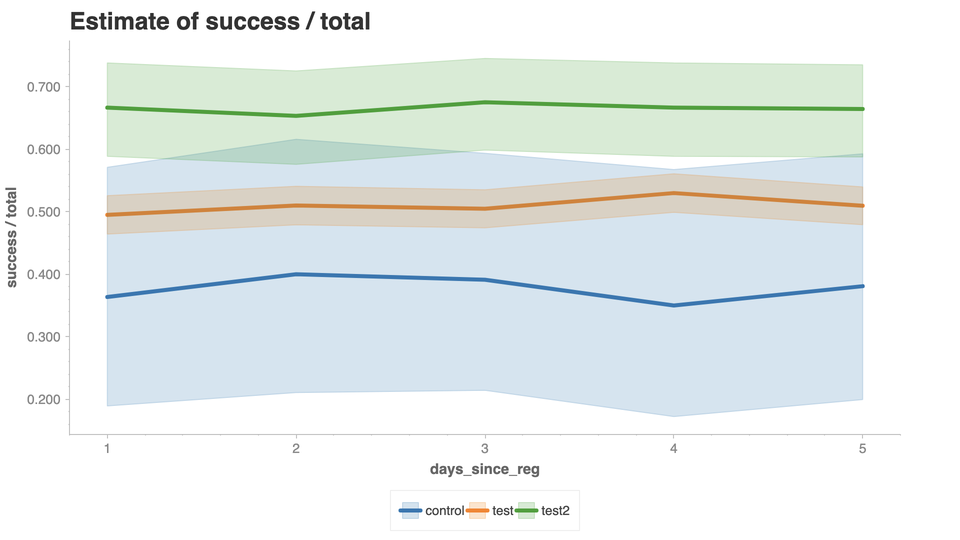

In [32]:
test.summary_plot().show('png')

In [33]:
test.difference(('control', 1), ('test', 1))

,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,"('control', 1)","('test', 1)",True,0.125497,-0.078808,0.308101,0.889504,-0.131163,0.005666,-0.005666,0.131163


In [34]:
test.difference(1, 2, groupby='variation_name')

,variation_name,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,control,1,2,True,0.035198,-0.245672,0.315504,0.595486,-0.076780,0.041582,-0.041582,0.076780
1,test,1,2,True,0.015011,-0.028599,0.058582,0.749468,-0.018333,0.003321,-0.003321,0.018333
2,test2,1,2,True,-0.012981,-0.118972,0.093076,0.405154,-0.015731,0.028712,-0.028712,0.015731


In [35]:
test.difference('control', 'test', groupby='days_since_reg')

,days_since_reg,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,1,control,test,True,0.125497,-0.078808,0.308101,0.889504,-0.131163,0.005666,-0.005666,0.131163
1,2,control,test,True,0.105375,-0.107547,0.301619,0.836512,-0.114890,0.009514,-0.009514,0.114890
2,3,control,test,True,0.108845,-0.091707,0.293138,0.859032,-0.116246,0.007401,-0.007401,0.116246
3,4,control,test,True,0.173042,-0.039980,0.360664,0.945232,-0.175586,0.002545,-0.002545,0.175586
4,5,control,test,True,0.122824,-0.086123,0.312655,0.878232,-0.129314,0.006491,-0.006491,0.129314


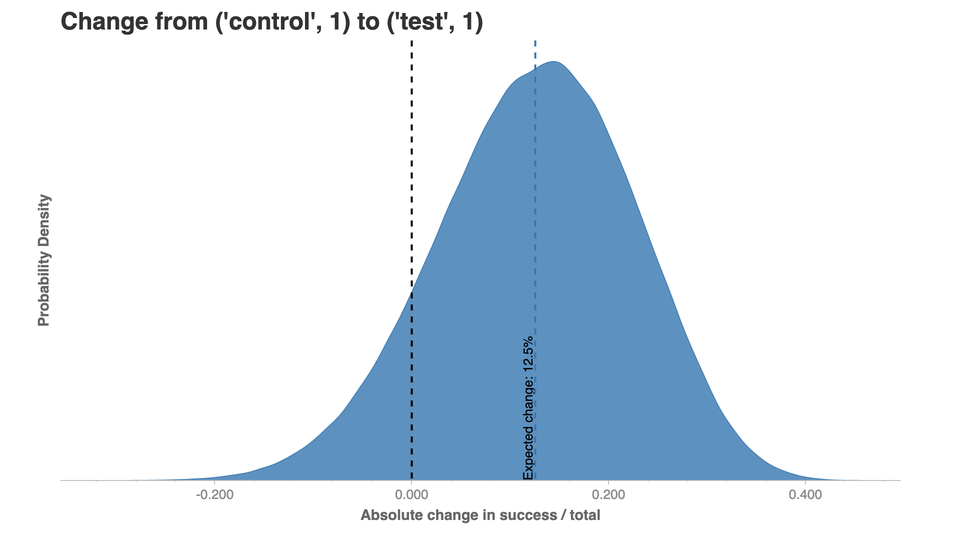

In [36]:
test.difference_plot(('control', 1), ('test', 1)).show('png')

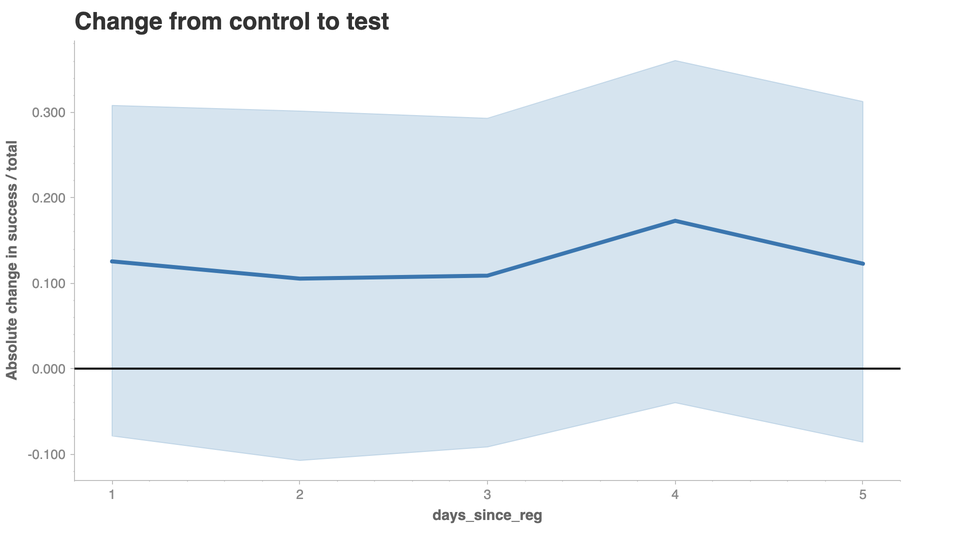

In [37]:
test.difference_plot('control', 'test', groupby='days_since_reg').show('png')

In [38]:
test.multiple_difference(level='control', level_as_reference=True, groupby='days_since_reg')

,days_since_reg,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,1,control,test,True,0.125497,-0.078808,0.308101,0.889504,-0.131163,0.005666,-0.005666,0.131163
1,1,control,test2,True,0.296261,0.082083,0.491822,0.996578,-0.296371,0.000110,-0.000110,0.296371
2,2,control,test,True,0.105114,-0.108412,0.301877,0.834746,-0.114703,0.009590,-0.009590,0.114703
3,2,control,test2,True,0.247916,0.023538,0.456710,0.984826,-0.248494,0.000578,-0.000578,0.248494
4,3,control,test,True,0.108755,-0.091976,0.293397,0.858546,-0.116248,0.007493,-0.007493,0.116248
5,3,control,test2,True,0.278191,0.067520,0.474104,0.995294,-0.278341,0.000150,-0.000150,0.278341
6,4,control,test,True,0.173046,-0.039853,0.361055,0.945390,-0.175579,0.002533,-0.002533,0.175579
7,4,control,test2,True,0.308144,0.085283,0.508574,0.996566,-0.308256,0.000112,-0.000112,0.308256
8,5,control,test,True,0.122876,-0.086391,0.312245,0.877688,-0.129400,0.006524,-0.006524,0.129400
9,5,control,test2,True,0.276827,0.058186,0.478917,0.993642,-0.277049,0.000222,-0.000222,0.277049


## Ordinal + 2 categorical

In [39]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',],
                   'success': [500, 8, 100,
                               510, 8, 100,
                               520, 9, 104,
                               530, 7, 100,
                               530, 8, 103,
                               500, 8, 100,
                               510, 8, 100,
                               520, 9, 104,
                               530, 7, 100,
                               530, 8, 103,],
                   'total': [2010, 42, 250,
                             2000, 40, 253,
                             2030, 43, 254,
                             2000, 40, 250,
                             2040, 41, 255,
                             1010, 22, 150,
                             1000, 20, 153,
                             1030, 23, 154,
                             1000, 20, 150,
                             1040, 21, 155,],
                   'days_since_reg': [1, 1, 1,
                                      2, 2, 2,
                                      3, 3, 3,
                                      4, 4, 4,
                                      5, 5, 5,
                                      1, 1, 1,
                                      2, 2, 2,
                                      3, 3, 3,
                                      4, 4, 4,
                                      5, 5, 5],
                   'country': ['us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us',
                               'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb',]})
df.head()

,variation_name,success,total,days_since_reg,country
0,test,500,2010,1,us
1,control,8,42,1,us
2,test2,100,250,1,us
3,test,510,2000,2,us
4,control,8,40,2,us


In [40]:
test = confidence.BetaBinomial(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               categorical_group_columns=['variation_name', 'country'],
                               ordinal_group_column='days_since_reg')

In [41]:
test.summary()

,variation_name,country,days_since_reg,success,total,point_estimate,ci_lower,ci_upper
0,test,us,1,500,2010,0.248756,0.230229,0.268007
1,control,us,1,8,42,0.190476,0.094403,0.327494
2,test2,us,1,100,250,0.400000,0.340709,0.461591
3,test,us,2,510,2000,0.255000,0.236262,0.274447
4,control,us,2,8,40,0.200000,0.099374,0.342221
5,test2,us,2,100,253,0.395257,0.336483,0.456412
6,test,us,3,520,2030,0.256158,0.237526,0.275484
7,control,us,3,9,43,0.209302,0.108929,0.347289
8,test2,us,3,104,254,0.409449,0.350283,0.470665
9,test,us,4,530,2000,0.265000,0.246008,0.284672


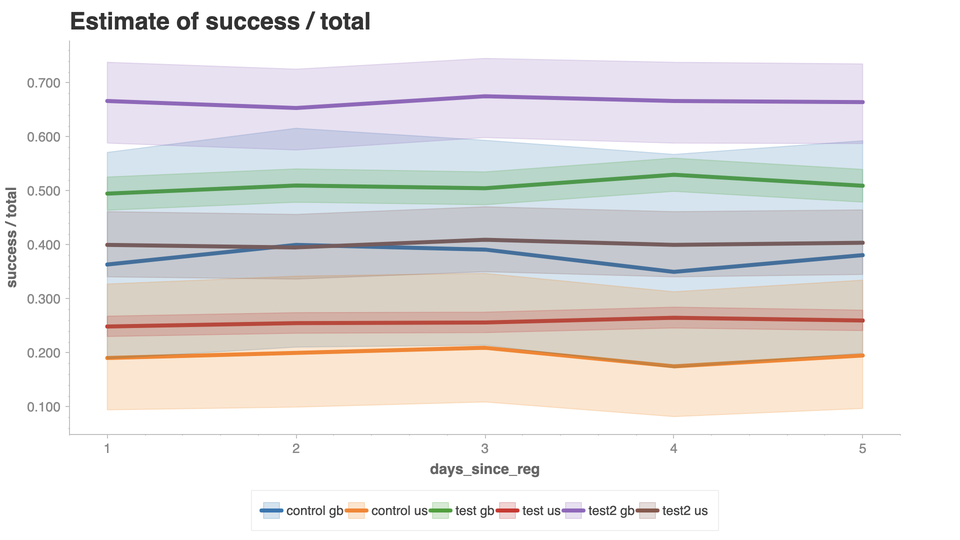

In [42]:
test.summary_plot().show('png')

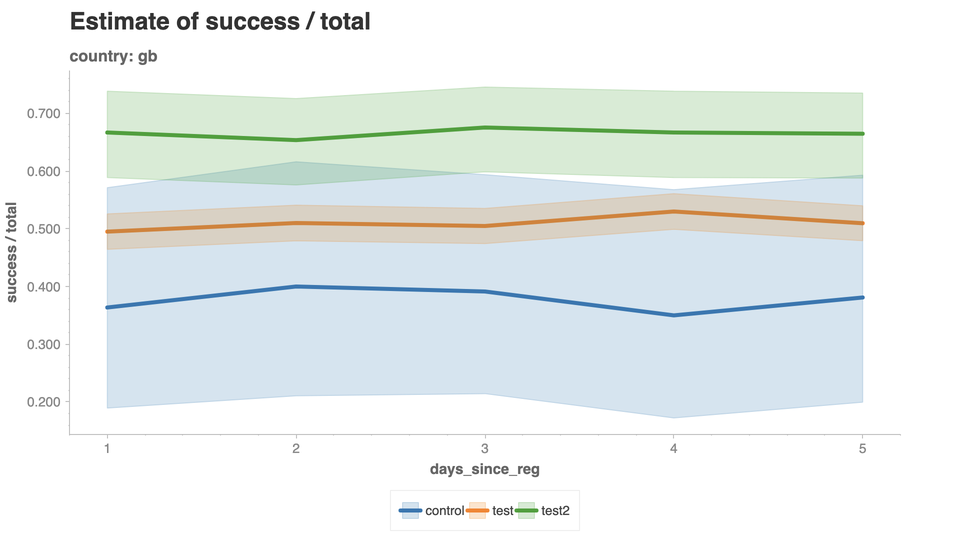

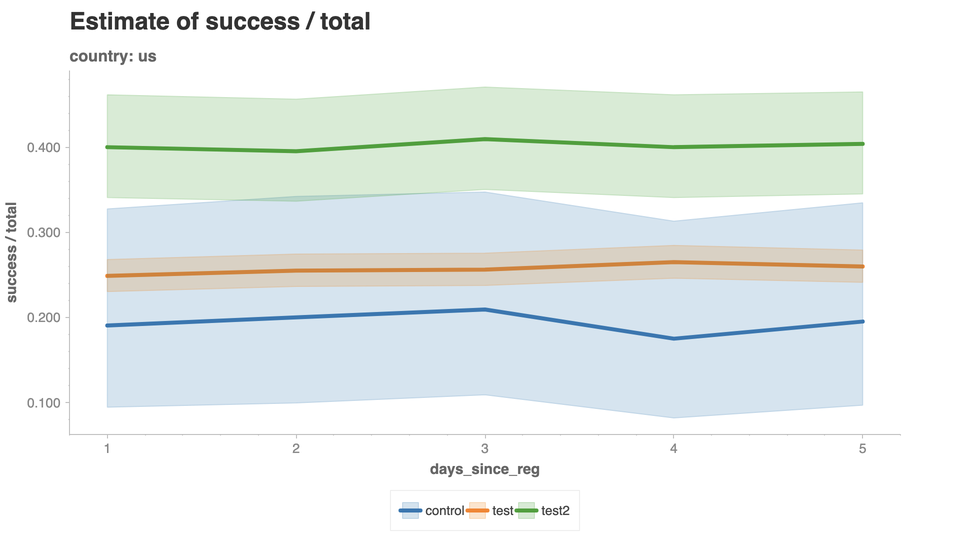

In [43]:
test.summary_plot(groupby='country').show('png')

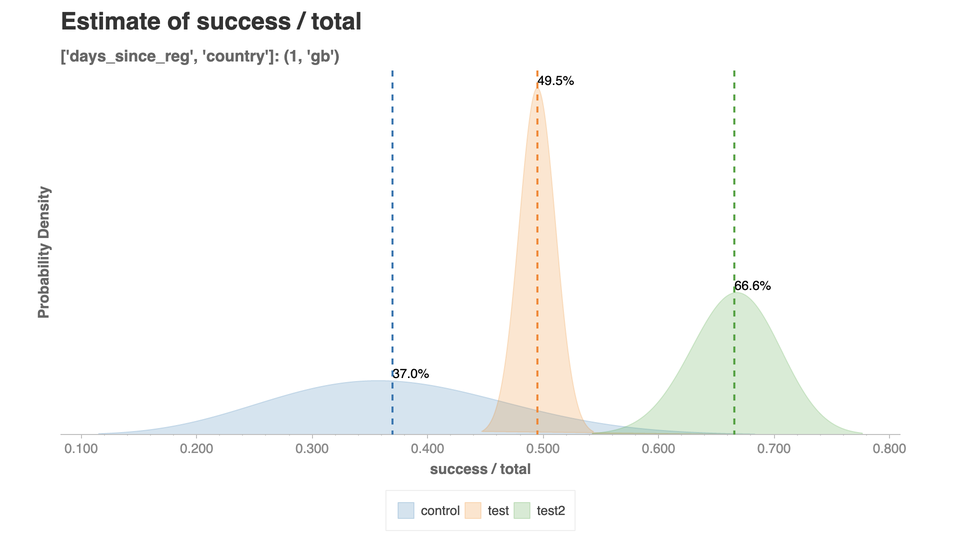

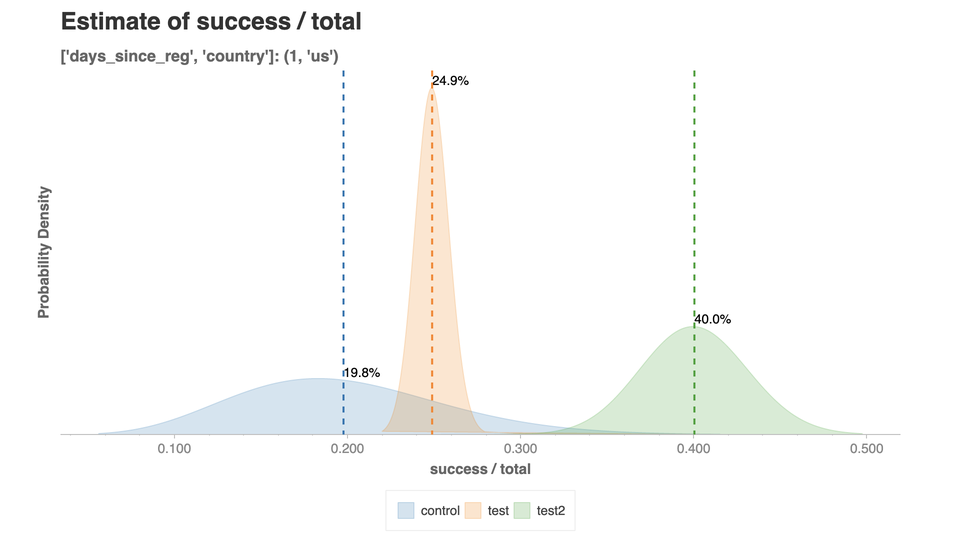

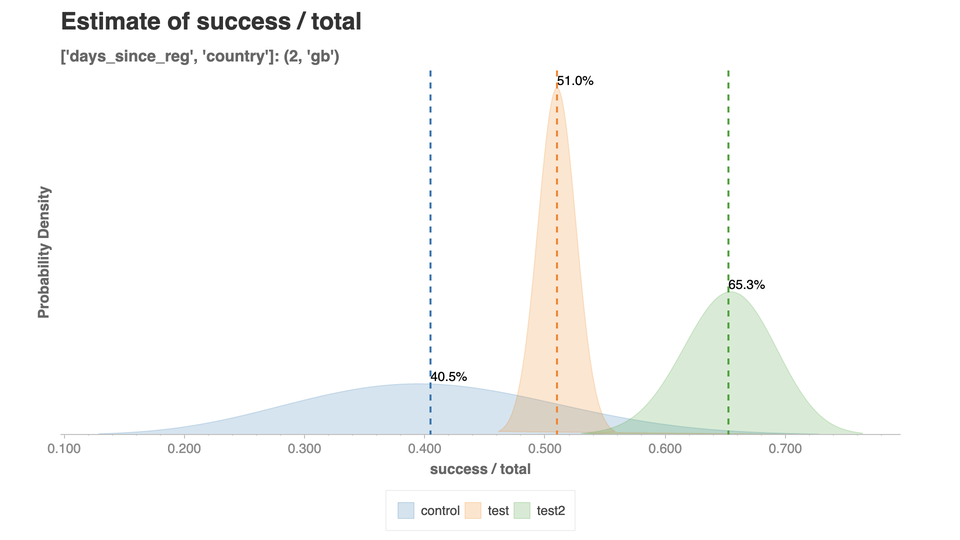

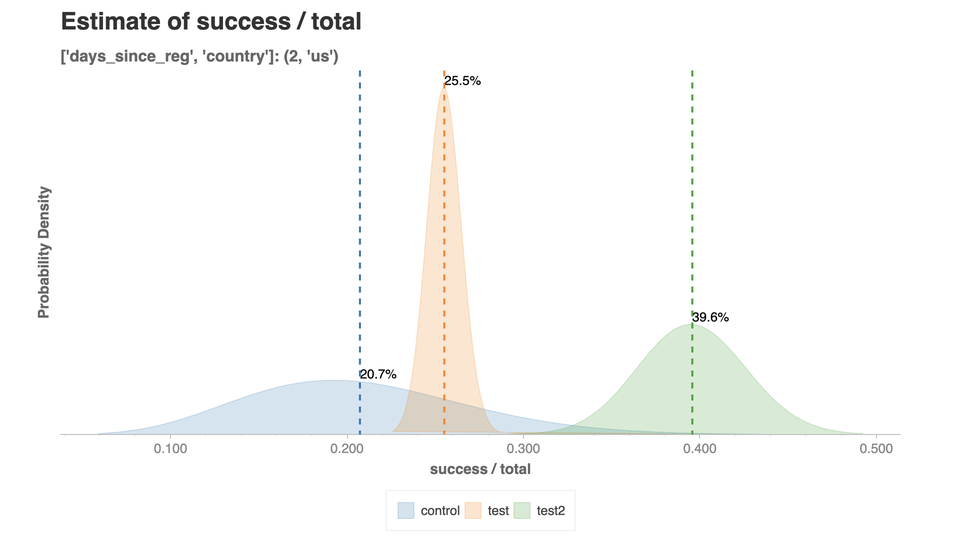

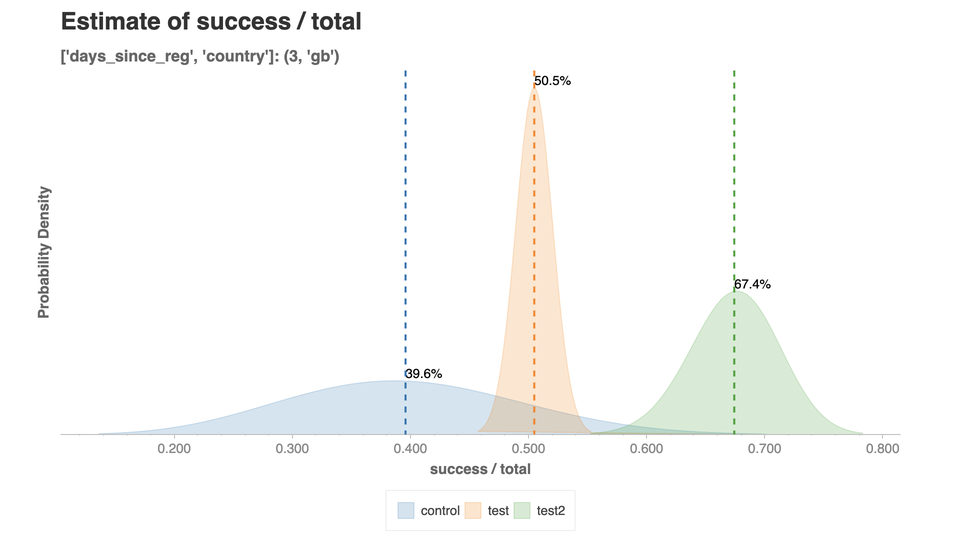

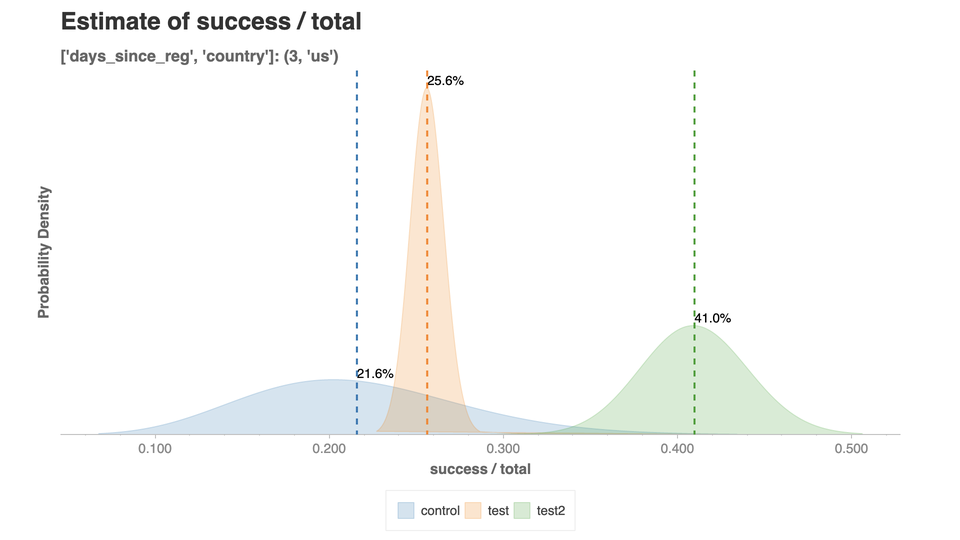

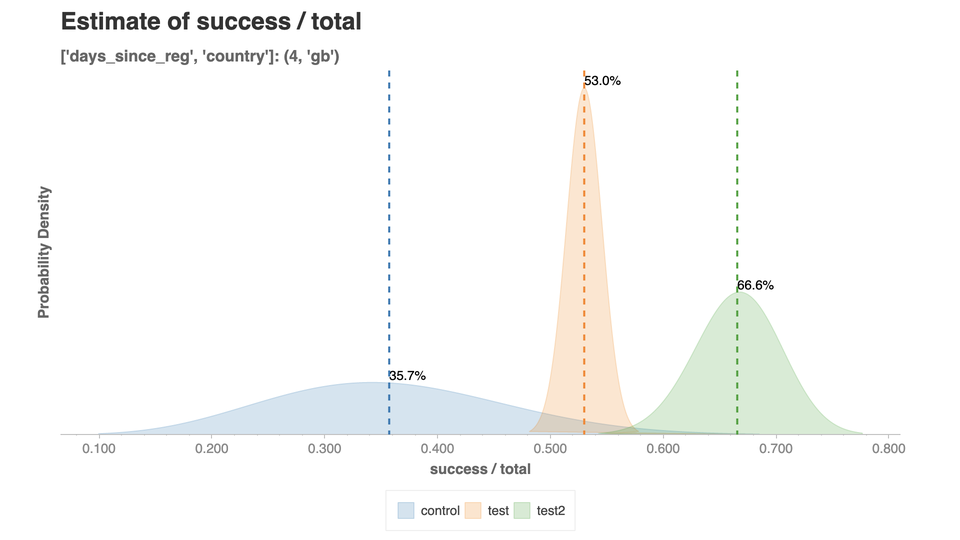

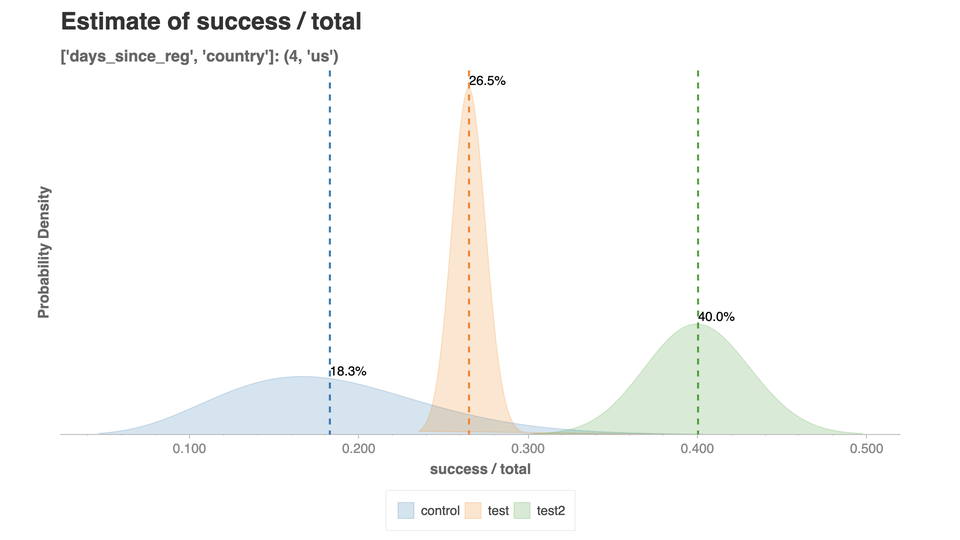

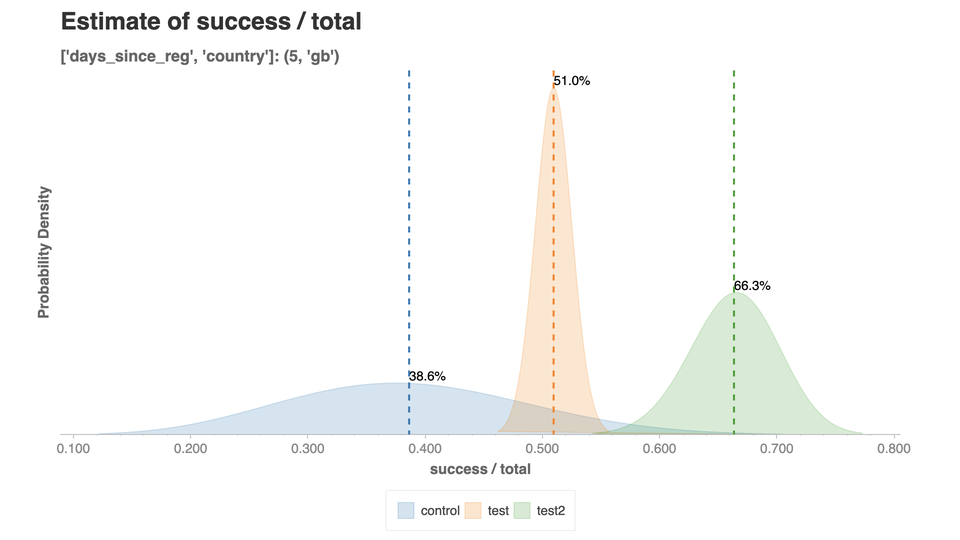

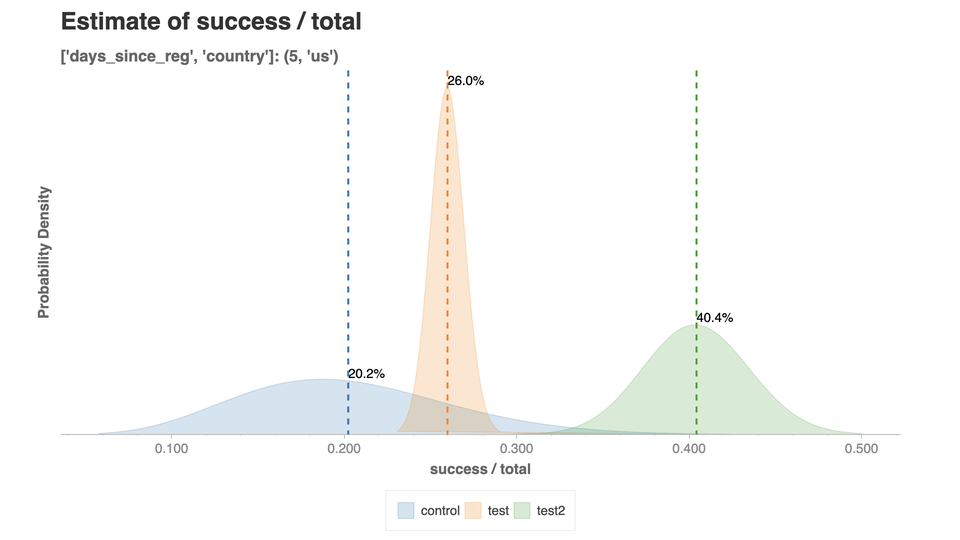

In [44]:
test.summary_plot(groupby=['days_since_reg', 'country']).show('png')

In [45]:
test.multiple_difference(level=('control', 'us'), level_as_reference=True, groupby=['days_since_reg'])

,days_since_reg,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,P(level_2 > level_1),level_1 potential loss,level_1 potential gain,level_2 potential loss,level_2 potential gain
0,1,"('control', 'us')","('control', 'gb')",True,0.171884,-0.049524,0.400927,0.933940,-0.175011,3.126678e-03,-3.126678e-03,0.175011
1,1,"('control', 'us')","('test', 'gb')",True,0.297375,0.164480,0.405446,0.999966,-0.297376,6.158067e-07,-6.158067e-07,0.297376
2,1,"('control', 'us')","('test', 'us')",True,0.051275,-0.080010,0.156316,0.805376,-0.059024,7.749499e-03,-7.749499e-03,0.059024
3,1,"('control', 'us')","('test2', 'gb')",True,0.467864,0.318710,0.596751,1.000000,-0.467864,0.000000e+00,0.000000e+00,0.467864
4,1,"('control', 'us')","('test2', 'us')",True,0.202641,0.060899,0.324336,0.996428,-0.202736,9.468641e-05,-9.468641e-05,0.202736
5,2,"('control', 'us')","('control', 'gb')",True,0.197466,-0.037121,0.437804,0.949052,-0.199898,2.431953e-03,-2.431953e-03,0.199898
6,2,"('control', 'us')","('test', 'gb')",True,0.302829,0.164779,0.415781,0.999980,-0.302830,5.993305e-07,-5.993305e-07,0.302830
7,2,"('control', 'us')","('test', 'us')",True,0.047719,-0.087873,0.157656,0.781756,-0.056911,9.192046e-03,-9.192046e-03,0.056911
8,2,"('control', 'us')","('test2', 'gb')",True,0.445170,0.291667,0.578219,1.000000,-0.445170,0.000000e+00,0.000000e+00,0.445170
9,2,"('control', 'us')","('test2', 'us')",True,0.188236,0.041528,0.313893,0.993118,-0.188427,1.912838e-04,-1.912838e-04,0.188427


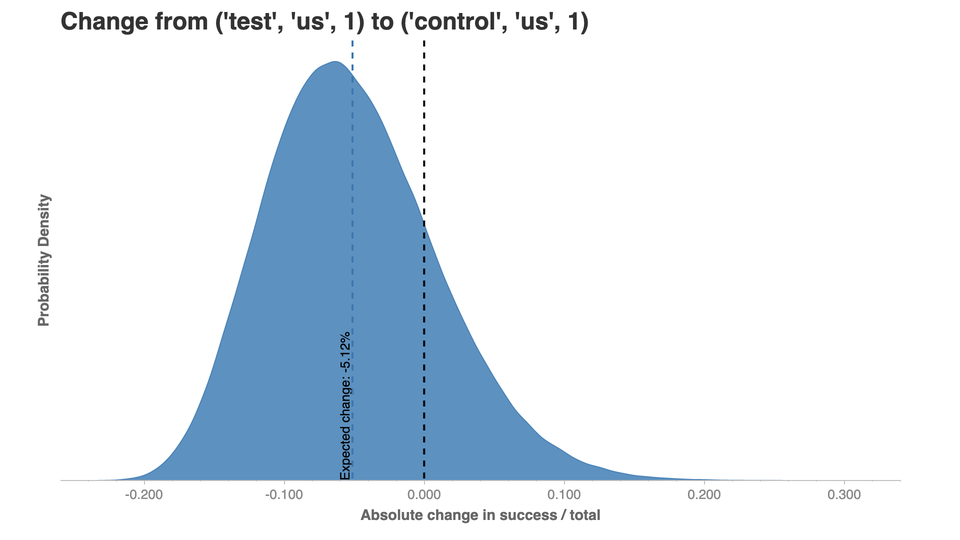

In [46]:
test.difference_plot(('test', 'us', 1), ('control', 'us', 1)).show('png')

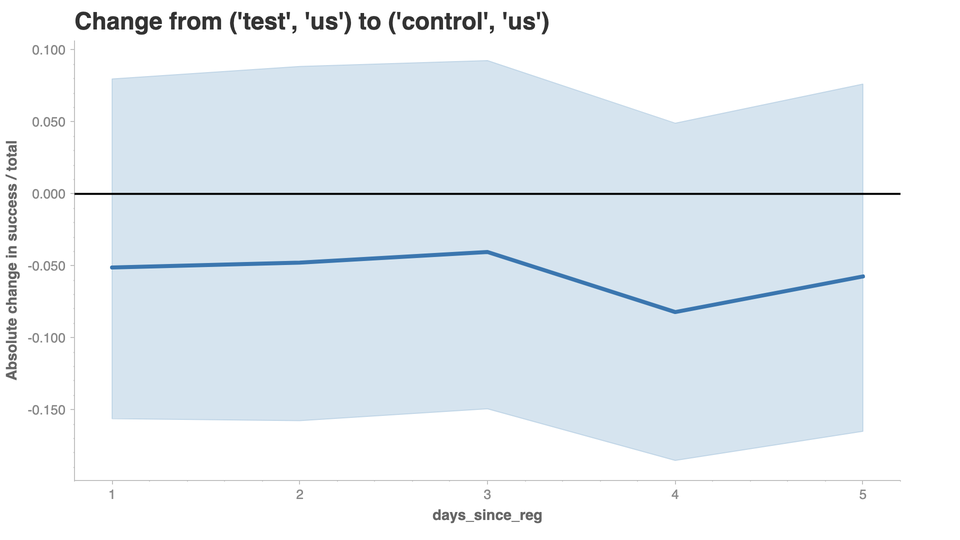

In [47]:
test.difference_plot(('test', 'us'), ('control', 'us'), groupby='days_since_reg').show('png')